In [1]:
#Nama : Dziand Dafi Ginandjar
#NIM : 12321072

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import folium

from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from sklearn.cluster import DBSCAN, KMeans, SpectralClustering

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/dzianddafi/Documents/Semester 7/ML in Geophysics/TurkeyEQ.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             97 non-null     object 
 1   latitude         97 non-null     float64
 2   longitude        97 non-null     float64
 3   depth            97 non-null     float64
 4   mag              97 non-null     float64
 5   magType          97 non-null     object 
 6   nst              59 non-null     float64
 7   gap              97 non-null     int64  
 8   dmin             97 non-null     float64
 9   rms              97 non-null     float64
 10  net              97 non-null     object 
 11  id               97 non-null     object 
 12  updated          97 non-null     object 
 13  place            97 non-null     object 
 14  type             97 non-null     object 
 15  horizontalError  97 non-null     float64
 16  depthError       97 non-null     float64
 17  magError         9

In [4]:
df = df[['time', 'latitude', 'longitude', 'mag', 'depth']]
df.shape

(97, 5)

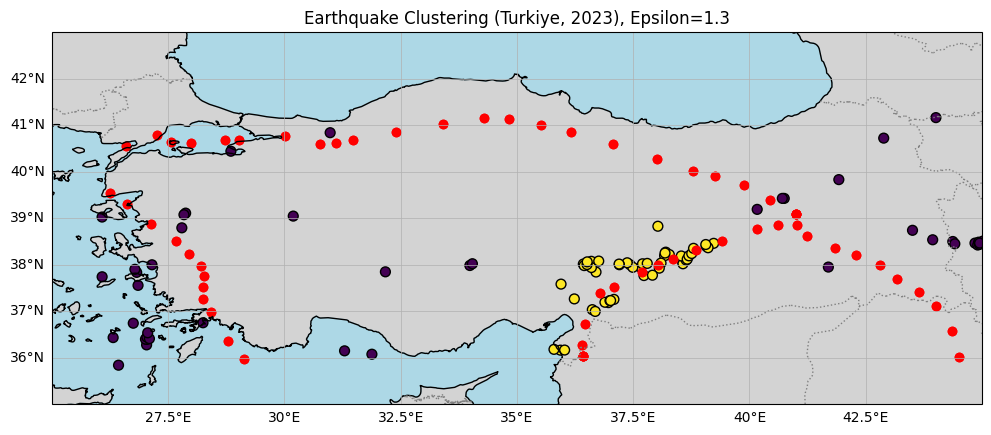

In [5]:
X = np.array(df['longitude']).reshape(-1, 1)
y = np.array(df['latitude'])

lonmin = df['longitude'].min()
lonmax = df['longitude'].max()

latmin = df['latitude'].min()
latmax = df['latitude'].max()

plate = pd.read_csv('all.csv')
plate = plate.query(f'{latmin} < lat < {latmax}')
plate = plate.query(f'{lonmin} < lon < {lonmax}')

#Using DBSCAN
dbscan = DBSCAN(eps=1.3, min_samples=30)
clusters = dbscan.fit_predict(X)
df['dbscan'] = clusters
df['dbscan'].replace(-1, 1, inplace=True)

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,10))

#Defining the location of Turkiye
ax.set_extent([25, 45, 35, 43])  

#Adding some features on map
ax.coastlines(resolution='10m') 
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray') 
ax.add_feature(cfeature.LAND, color='lightgray') 
ax.add_feature(cfeature.OCEAN, color='lightblue')  

#Adding gridlines
gridlines = ax.gridlines(draw_labels=True, linestyle="-", linewidth=0.5)
gridlines.top_labels = False 
gridlines.right_labels = False 

ax.grid()
ax.scatter(X, y, c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
ax.scatter(plate['lon'], plate['lat'], marker='o', c='r')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Earthquake Clustering (Turkiye, 2023), Epsilon=1.3')

plt.show()

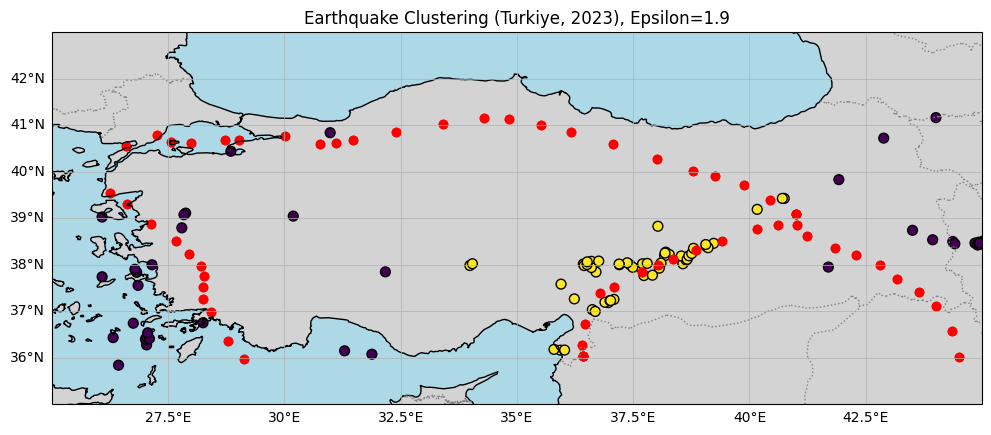

In [6]:
#Using DBSCAN
dbscan = DBSCAN(eps=1.9, min_samples=30)
clusters = dbscan.fit_predict(X)
df['dbscan'] = clusters
df['dbscan'].replace(-1, 1, inplace=True)

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,10))

#Defining the location of Turkiye
ax.set_extent([25, 45, 35, 43])  

#Adding some features on map
ax.coastlines(resolution='10m') 
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray') 
ax.add_feature(cfeature.LAND, color='lightgray') 
ax.add_feature(cfeature.OCEAN, color='lightblue')  

#Adding gridlines
gridlines = ax.gridlines(draw_labels=True, linestyle="-", linewidth=0.5)
gridlines.top_labels = False 
gridlines.right_labels = False 

ax.grid()
ax.scatter(X, y, c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
ax.scatter(plate['lon'], plate['lat'], marker='o', c='r')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Earthquake Clustering (Turkiye, 2023), Epsilon=1.9')

plt.show()

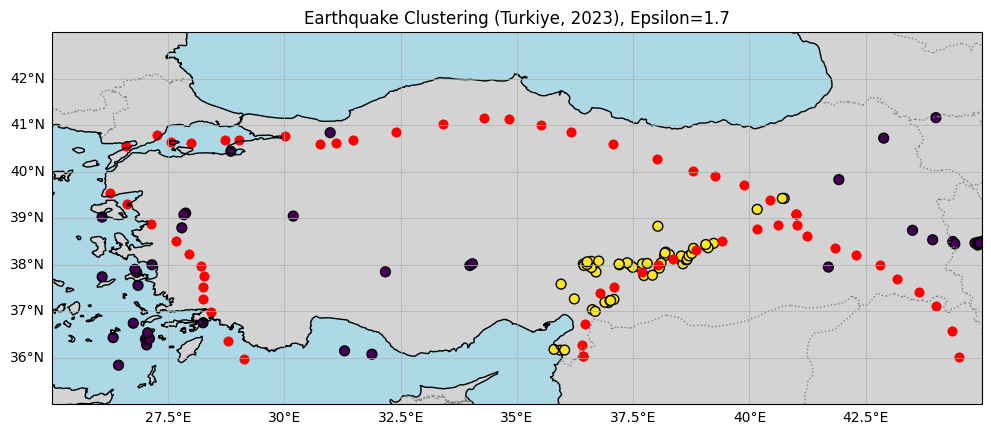

In [7]:
#Using DBSCAN
dbscan = DBSCAN(eps=1.7, min_samples=30)
clusters = dbscan.fit_predict(X)
df['dbscan'] = clusters
df['dbscan'].replace(-1, 1, inplace=True)

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,10))

#Defining the location of Turkiye
ax.set_extent([25, 45, 35, 43])  

#Adding some features on map
ax.coastlines(resolution='10m') 
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray') 
ax.add_feature(cfeature.LAND, color='lightgray') 
ax.add_feature(cfeature.OCEAN, color='lightblue')  

#Adding gridlines
gridlines = ax.gridlines(draw_labels=True, linestyle="-", linewidth=0.5)
gridlines.top_labels = False 
gridlines.right_labels = False 

ax.grid()
ax.scatter(X, y, c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
ax.scatter(plate['lon'], plate['lat'], marker='o', c='r')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Earthquake Clustering (Turkiye, 2023), Epsilon=1.7')

plt.show()

In [8]:
#Define marker color
def function(item):
    if item == 1:
        return 'black'
    else:
        return 'red'

df['marker'] = df['dbscan'].apply(function)
df

,time,latitude,longitude,mag,depth,dbscan,marker
0,2023-12-04T07:42:20.496Z,40.4371,28.8480,5.1,10.117,1,black
1,2023-11-23T14:46:09.122Z,38.0841,38.5520,5.3,10.000,0,red
2,2023-08-10T17:48:01.234Z,38.2665,38.2011,5.2,10.000,0,red
3,2023-07-25T05:44:51.283Z,37.5794,35.9482,5.5,13.116,0,red
4,2023-04-26T20:00:34.782Z,36.4294,26.3159,5.1,116.496,1,black
...,...,...,...,...,...,...,...
92,2020-02-23T05:53:01.055Z,38.4465,44.4168,5.8,10.000,1,black
93,2020-01-28T11:26:15.000Z,39.1061,27.8750,5.0,10.000,1,black
94,2020-01-25T16:30:11.109Z,38.3615,39.1096,5.1,10.000,0,red
95,2020-01-24T17:55:14.147Z,38.4312,39.0609,6.7,10.000,0,red


In [9]:
long = np.array(df['longitude'])
lat = np.array(df['latitude'])

long.shape

(97,)

In [10]:
lat.shape

(97,)

In [11]:
coordinate = np.array([long, lat]).T
coordinate.shape

(97, 2)

In [12]:
site_map = folium.Map(zoom_start=10)

In [13]:
# Plot hasil clustering berdasarkan marker
marker_cluster = MarkerCluster()
site_map.add_child(marker_cluster)

for index, record in df.iterrows():
    marker = folium.Marker(location=[record['latitude'], record['longitude']], icon=folium.map.Icon(color='white', icon_color=record['marker']))
    marker_cluster.add_child(marker)

for i in range (len(df.index)):
    coordinate = [df["latitude"][i], df["longitude"][i]]
    circle = folium.Circle(coordinate, radius=100, color='#d35400', fill=True).add_child(folium.Popup(df["mag"][i]))
    marker = folium.map.Marker(
            coordinate,
            icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % df["mag"][i],
            )
        )
    site_map.add_child(circle)
    site_map.add_child(marker)


site_map